In [2]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame
import sklearn as sk
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

In [7]:
df = pd.read_csv('/Users/jayco/Desktop/EBGN590/econometrics-data-memos/Data/memo6_data.csv')
df.head()

,DATE,PNGASUSUSDM,WPU0531_NBD20200401
0,2020-04-01,1.763636,100.00000
1,2020-05-01,1.809048,123.50515
2,2020-06-01,1.699545,116.08247
3,2020-07-01,1.764783,109.89691
4,2020-08-01,2.340476,132.37113


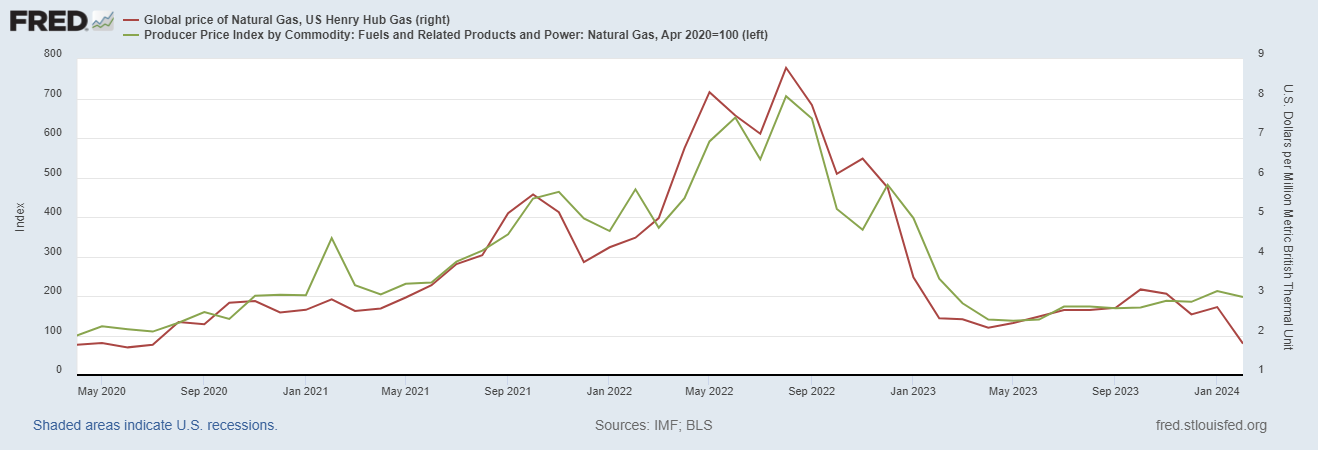

In [69]:
ppi = df[['WPU0531']]
hhng = df['PNGASUSUSDM'] 
ppi.shape,hhng.shape

((47, 1), (47,))

Text(0.5, 0.98, 'Nat Gas PPI vs. Henry Hub Price')

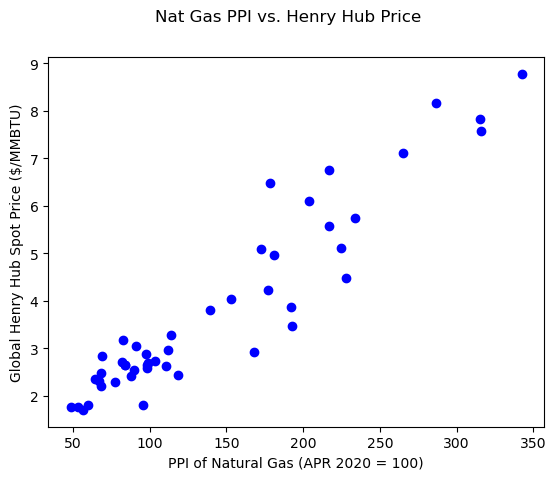

In [63]:
plt.scatter(ppi,hhng,c='b')
plt.xlabel('PPI of Natural Gas (APR 2020 = 100)')
plt.ylabel('Global Henry Hub Spot Price ($/MMBTU)')
plt.suptitle('Nat Gas PPI vs. Henry Hub Price')

In [74]:
#Add intercept
ppi2 = sm.add_constant(ppi2)

# Fit the model
model = sm.OLS(hhng, ppi2).fit()

# Make predictions
predictions = model.predict(ppi2)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PNGASUSUSDM   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     358.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.67e-23
Time:                        11:48:55   Log-Likelihood:                -45.493
No. Observations:                  47   AIC:                             94.99
Df Residuals:                      45   BIC:                             98.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5312      0.198      2.686      0.010       0.133       0.930
WPU0531        0.0231      0.001     18.927      0.000       0.021       0.026
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.608
Skew:                          -0.130   Prob(JB):                        0.271
Kurtosis:                       4.124   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

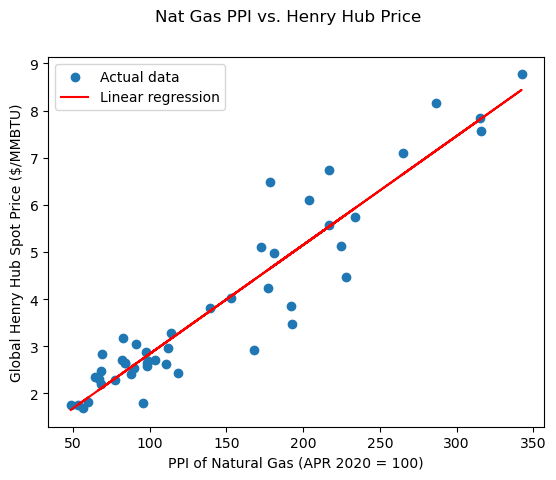

In [73]:
plt.scatter(ppi2['WPU0531'], hhng, label='Actual data')
plt.plot(ppi2['WPU0531'], predictions, color='red', label='Linear regression')
plt.xlabel('PPI of Natural Gas (APR 2020 = 100)')
plt.ylabel('Global Henry Hub Spot Price ($/MMBTU)')
plt.suptitle('Nat Gas PPI vs. Henry Hub Price')
plt.legend()
plt.show()